In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [18]:
df = pd.read_csv('./data/data_cleaned_2.csv')

In [19]:
df.head()

,Unnamed: 0,id,host_id,host_since,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,...,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,0,a few days or more,within a day,within a few hours,within an hour
0,0,11551,43039,3836.0,100,1,3.0,1,1,london,...,0,0,1,0,0,0,0,0,0,1
1,2,13913,54730,3792.0,90,0,4.0,1,0,islington,...,1,0,0,0,0,0,0,0,1,0
2,3,38407,164566,3554.0,0,0,1.0,1,0,london,...,0,0,1,0,0,0,1,0,0,0
3,4,90700,491286,3285.0,86,0,2.0,1,0,kensington,...,0,0,1,0,0,0,0,1,0,0
4,5,15400,60302,3773.0,0,0,1.0,1,1,london,...,0,0,1,0,0,1,0,0,0,0


In [20]:
dataset = df.loc[:, df.columns != 'price']
dataset

,Unnamed: 0,id,host_id,host_since,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,...,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,0,a few days or more,within a day,within a few hours,within an hour
0,0,11551,43039,3836.0,100,1,3.0,1,1,london,...,0,0,1,0,0,0,0,0,0,1
1,2,13913,54730,3792.0,90,0,4.0,1,0,islington,...,1,0,0,0,0,0,0,0,1,0
2,3,38407,164566,3554.0,0,0,1.0,1,0,london,...,0,0,1,0,0,0,1,0,0,0
3,4,90700,491286,3285.0,86,0,2.0,1,0,kensington,...,0,0,1,0,0,0,0,1,0,0
4,5,15400,60302,3773.0,0,0,1.0,1,1,london,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84502,85063,39868875,13553423,2201.0,100,0,1.0,1,0,greater-london,...,0,0,1,0,0,0,0,0,0,1
84503,85064,39869123,21145791,2034.0,100,0,1.0,1,0,greater-london,...,0,0,0,0,0,0,0,0,0,1
84504,85065,39869214,251922260,372.0,100,0,18.0,1,0,london,...,0,0,1,0,0,0,0,0,0,1
84505,85066,39869249,255372486,358.0,50,0,1.0,1,0,greater-london,...,0,0,0,0,0,0,0,1,0,0


In [23]:
X = dataset.loc[:, dataset.columns != 'city'].values
X

array([[0.00000000e+00, 1.15510000e+04, 4.30390000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.39130000e+04, 5.47300000e+04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.84070000e+04, 1.64566000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.50650000e+04, 3.98692140e+07, 2.51922260e+08, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [8.50660000e+04, 3.98692490e+07, 2.55372486e+08, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.50670000e+04, 3.98692820e+07, 2.10531062e+08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [24]:
Y = df.loc[:, df.columns == 'price'].values
Y

array([[ 88.],
       [ 65.],
       [ 79.],
       ...,
       [ 90.],
       [ 30.],
       [187.]])

In [25]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [26]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [27]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [28]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(59154, 353) (12676, 353) (12677, 353) (59154, 1) (12676, 1) (12677, 1)


## Model 1

In [32]:
model = Sequential([
    Dense(100, activation='relu', input_shape=(353,)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='linear'),
])

In [33]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [34]:
hist = model.fit(X_train, Y_train,
          batch_size=100, epochs=100,
          validation_data=(X_val, Y_val))

Train on 59154 samples, validate on 12676 samples
Epoch 1/100
59154/59154 [==============================] - 1s 21us/step - loss: 44575.5182 - accuracy: 0.0081 - val_loss: 35652.4542 - val_accuracy: 0.0113
Epoch 2/100
59154/59154 [==============================] - 1s 18us/step - loss: 35500.6504 - accuracy: 0.0104 - val_loss: 26608.5270 - val_accuracy: 0.0090
Epoch 3/100
59154/59154 [==============================] - 1s 21us/step - loss: 27848.2885 - accuracy: 0.0099 - val_loss: 20003.5907 - val_accuracy: 0.0110
Epoch 4/100
59154/59154 [==============================] - 1s 17us/step - loss: 24312.8683 - accuracy: 0.0113 - val_loss: 20935.9570 - val_accuracy: 0.0129
Epoch 5/100
59154/59154 [==============================] - 1s 17us/step - loss: 22984.8901 - accuracy: 0.0113 - val_loss: 18869.2982 - val_accuracy: 0.0131
Epoch 6/100
59154/59154 [==============================] - 2s 30us/step - loss: 21607.5099 - accuracy: 0.0116 - val_loss: 18893.3781 - val_accuracy: 0.0064
Epoch 7/100
59

59154/59154 [==============================] - 1s 17us/step - loss: 7756.3562 - accuracy: 0.0129 - val_loss: 16678.1493 - val_accuracy: 0.0114
Epoch 54/100
59154/59154 [==============================] - 1s 18us/step - loss: 7542.6053 - accuracy: 0.0136 - val_loss: 15278.0324 - val_accuracy: 0.0151
Epoch 55/100
59154/59154 [==============================] - 1s 17us/step - loss: 7713.6122 - accuracy: 0.0136 - val_loss: 15530.1679 - val_accuracy: 0.0106
Epoch 56/100
59154/59154 [==============================] - 1s 17us/step - loss: 7110.6571 - accuracy: 0.0143 - val_loss: 15850.8073 - val_accuracy: 0.0151
Epoch 57/100
59154/59154 [==============================] - 2s 27us/step - loss: 7234.1861 - accuracy: 0.0131 - val_loss: 16742.0295 - val_accuracy: 0.0155
Epoch 58/100
59154/59154 [==============================] - 1s 17us/step - loss: 7208.3022 - accuracy: 0.0135 - val_loss: 16118.8791 - val_accuracy: 0.0119
Epoch 59/100
59154/59154 [==============================] - 1s 17us/step - lo

In [35]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               35400     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 65,801
Trainable params: 65,801
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
model.evaluate(X_test, Y_test)[1]

12677/12677 [==============================] - 0s 15us/step


0.012700165621936321

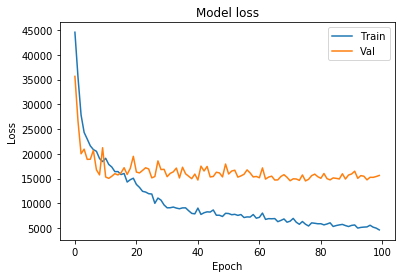

In [38]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

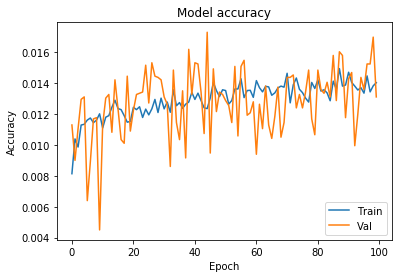

In [39]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [42]:
def print_result(model, x_val, y_val):
    y_pred_val = model.predict(x_val)
    print('---Test---')
    print('MAE: ', metrics.mean_absolute_error(y_val, y_pred_val))
    print('MSE: ', metrics.mean_squared_error(y_val, y_pred_val))
    print('R2: ', metrics.r2_score(y_val, y_pred_val))

In [45]:
print_result(model, X_train, Y_train)

---Test---
MAE:  31.933290572285262
MSE:  4638.0030498140095
R2:  0.9105454479594666


In [43]:
print_result(model, X_val, Y_val)

---Test---
MAE:  42.990046545096696
MSE:  15616.873507290957
R2:  0.6788561403309048


## Data with Lasso

In [46]:
data = pd.read_csv('./data/data_cleaned_2.csv')

In [47]:
data.head()

,Unnamed: 0,id,host_id,host_since,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,...,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,0,a few days or more,within a day,within a few hours,within an hour
0,0,11551,43039,3836.0,100,1,3.0,1,1,london,...,0,0,1,0,0,0,0,0,0,1
1,2,13913,54730,3792.0,90,0,4.0,1,0,islington,...,1,0,0,0,0,0,0,0,1,0
2,3,38407,164566,3554.0,0,0,1.0,1,0,london,...,0,0,1,0,0,0,1,0,0,0
3,4,90700,491286,3285.0,86,0,2.0,1,0,kensington,...,0,0,1,0,0,0,0,1,0,0
4,5,15400,60302,3773.0,0,0,1.0,1,1,london,...,0,0,1,0,0,1,0,0,0,0


In [51]:
X_2 = data.loc[:, data.columns != 'price'].values
Y_2 = data.loc[:, data.columns == 'price'].values

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
X_2_scale = min_max_scaler.fit_transform(X_2)

In [17]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_2_scale, Y_2, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(59154, 617) (12676, 617) (12677, 617) (59154, 1) (12676, 1) (12677, 1)


In [52]:
model_2 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(353,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [53]:
model_2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [54]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=100, epochs=100,
          validation_data=(X_val, Y_val))

Train on 59154 samples, validate on 12676 samples
Epoch 1/100
59154/59154 [==============================] - 2s 41us/step - loss: 66614.3748 - accuracy: 0.0000e+00 - val_loss: 63612.6687 - val_accuracy: 0.0000e+00
Epoch 2/100
59154/59154 [==============================] - 3s 42us/step - loss: 66607.4799 - accuracy: 0.0000e+00 - val_loss: 63611.8286 - val_accuracy: 0.0000e+00
Epoch 3/100
59154/59154 [==============================] - 2s 29us/step - loss: 66607.1707 - accuracy: 0.0000e+00 - val_loss: 63611.7479 - val_accuracy: 0.0000e+00
Epoch 4/100
59154/59154 [==============================] - 2s 28us/step - loss: 66607.1302 - accuracy: 0.0000e+00 - val_loss: 63611.7294 - val_accuracy: 0.0000e+00
Epoch 5/100
59154/59154 [==============================] - 2s 28us/step - loss: 66607.1199 - accuracy: 0.0000e+00 - val_loss: 63611.7214 - val_accuracy: 0.0000e+00
Epoch 6/100
59154/59154 [==============================] - 2s 37us/step - loss: 66607.1123 - accuracy: 0.0000e+00 - val_loss: 6361

59154/59154 [==============================] - 2s 30us/step - loss: 66607.0882 - accuracy: 0.0000e+00 - val_loss: 63611.6962 - val_accuracy: 0.0000e+00
Epoch 51/100
59154/59154 [==============================] - 2s 33us/step - loss: 66607.0879 - accuracy: 0.0000e+00 - val_loss: 63611.6962 - val_accuracy: 0.0000e+00
Epoch 52/100
59154/59154 [==============================] - 2s 28us/step - loss: 66607.0880 - accuracy: 0.0000e+00 - val_loss: 63611.6962 - val_accuracy: 0.0000e+00
Epoch 53/100
59154/59154 [==============================] - 2s 28us/step - loss: 66607.0871 - accuracy: 0.0000e+00 - val_loss: 63611.6962 - val_accuracy: 0.0000e+00
Epoch 54/100
59154/59154 [==============================] - 2s 28us/step - loss: 66607.0874 - accuracy: 0.0000e+00 - val_loss: 63611.6962 - val_accuracy: 0.0000e+00
Epoch 55/100
59154/59154 [==============================] - 2s 32us/step - loss: 66607.0879 - accuracy: 0.0000e+00 - val_loss: 63611.6962 - val_accuracy: 0.0000e+00
Epoch 56/100
59154/5915

Epoch 100/100
59154/59154 [==============================] - 2s 28us/step - loss: 66607.0870 - accuracy: 0.0000e+00 - val_loss: 63611.6962 - val_accuracy: 0.0000e+00


In [57]:
print_result(model_2, X_train, Y_train)

---Test---
MAE:  121.48914697230957
MSE:  66607.08907259018
R2:  -0.2846708490093379


In [58]:
print_result(model_2, X_val, Y_val)

---Test---
MAE:  122.40422846323762
MSE:  63611.69785421269
R2:  -0.3081047342458676
